# **Handling and Removing Outliers**
**outliers**: outliers are data points that differ significantly from other observations. they can occur due to variability in the data or experimental errors

**Handling Outliers**:This involves identifying and deciding whether to remove or adjust outliers to improve the accuracy of statistical analyses and machine learning models.


In [3]:
# loading the dataset
import pandas as pd
df=pd.read_csv('outliers_data.csv')
print(df)


      Name  Age   Salary Department
0    Alice   25    50000         HR
1      Bob   32    60000    Finance
2  Charlie   40    55000         IT
3    David   22    45000  Marketing
4      Eva   60    80000         HR
5    Frank   28   500000    Finance
6    Grace  120    48000         IT
7   Hannah   34    70000  Marketing
8      Ian   29    52000         HR
9     Jack  200  1500000    Finance


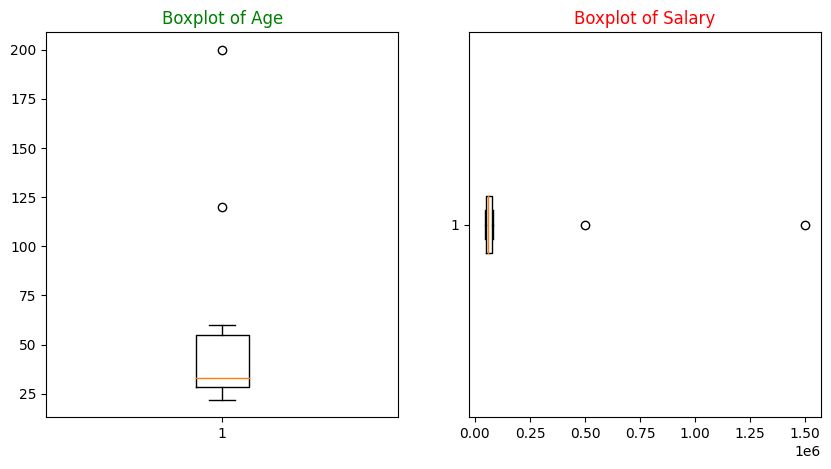

In [4]:
# Plotting the box plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
# plotting the boxplot of age coloumn
plt.subplot(1,2,1)
plt.boxplot(df["Age"].dropna(),)#dropna is used to remove the null value if there was.
plt.title("Boxplot of Age",color="g")

# plotting the boxplot of Salary coloumn
plt.subplot(1,2,2)
plt.boxplot(df["Salary"].dropna(),vert=False)#vert is used to plot graph vertically or horizontally
plt.title("Boxplot of Salary",color="r")

plt.show()

In [5]:
# Capping the outliers using the IQR method
df_capped=df.copy()
for col in ["Age","Salary"]:
  Q1=df_capped[col].quantile(0.25)
  Q3=df_capped[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  df_capped[col]=df_capped[col].apply(lambda x: upper_bound if x>upper_bound else(lower_bound if x<lower_bound else x))
print(df_capped)

      Name     Age    Salary Department
0    Alice  25.000   50000.0         HR
1      Bob  32.000   60000.0    Finance
2  Charlie  40.000   55000.0         IT
3    David  22.000   45000.0  Marketing
4      Eva  60.000   80000.0         HR
5    Frank  28.000  118000.0    Finance
6    Grace  95.125   48000.0         IT
7   Hannah  34.000   70000.0  Marketing
8      Ian  29.000   52000.0         HR
9     Jack  95.125  118000.0    Finance


In [6]:
# replacing the outliers with median
df_replace=df.copy()
for col in ["Age","Salary"]:
  Q1=df_replace[col].quantile(0.25)
  Q3=df_replace[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  df_replace[col]=df_replace[col].apply(lambda x: df_replace[col].median() if x>upper_bound or x<lower_bound else x)
print(df_replace)

      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob  32.0  60000.0    Finance
2  Charlie  40.0  55000.0         IT
3    David  22.0  45000.0  Marketing
4      Eva  60.0  80000.0         HR
5    Frank  28.0  57500.0    Finance
6    Grace  33.0  48000.0         IT
7   Hannah  34.0  70000.0  Marketing
8      Ian  29.0  52000.0         HR
9     Jack  33.0  57500.0    Finance
